<a href="https://colab.research.google.com/github/WHARN0/Pengolahan-Citra-dan-Visi-Komputer/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


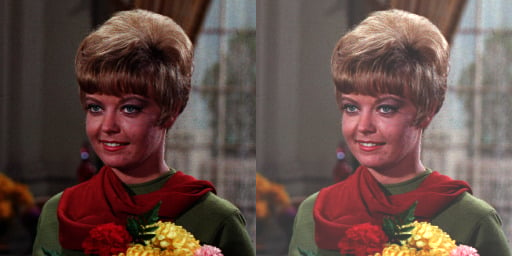

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

TUGAS PRAKTIKUM
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

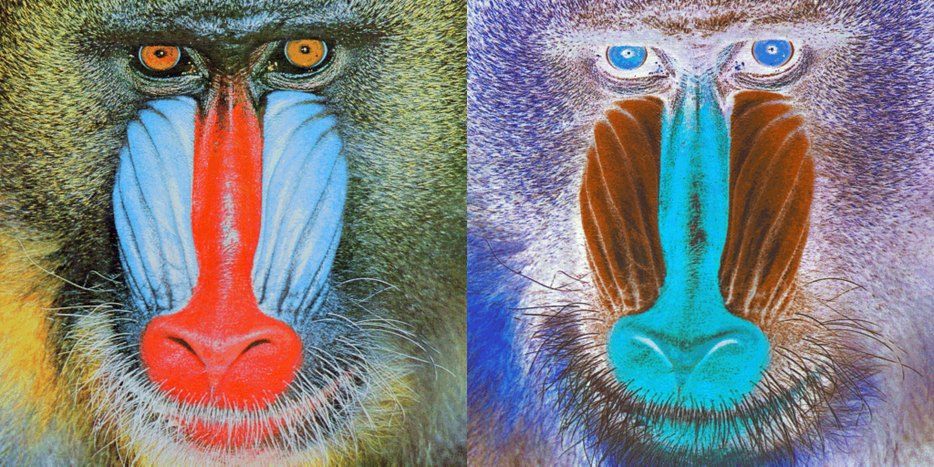

In [4]:
#Tugas praktikum 1

original1 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
negative_image = np.zeros(original1.shape, original1.dtype)

# akses per piksel
for y in range(negative_image.shape[0]):
  for x in range(negative_image.shape[1]):
    for c in range(negative_image.shape[2]):
      negative_image[y,x,c] = 255 - original1[y,x,c]

final_frame1 = cv.hconcat((original1, negative_image))
cv2_imshow(final_frame1)

TUGAS PRAKTIKUM
2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


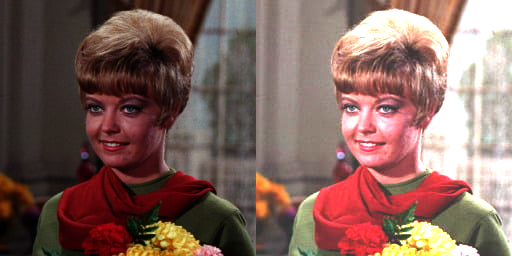

In [8]:
#Tugas praktikum 2

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
  brightness1 = float(input('Masukkan tingkat kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

contrast_img = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(contrast_img.shape[0]):
  for x in range(contrast_img.shape[1]):
    for c in range(contrast_img.shape[2]):
      contrast_img[y,x,c] = np.clip(contrast * original[y,x,c] + brightness1, 0, 255)

final_frame2 = cv.hconcat((original, contrast_img))
cv2_imshow(final_frame2)

TUGAS PRAKTIKUM
3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


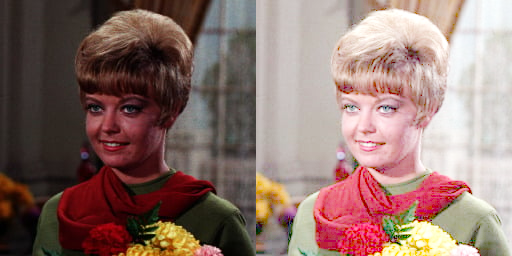

In [9]:
#Tugas praktikum 3

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try:
  brightness2 = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original2 = original.astype(np.float64)
logarithmic_img = brightness2 * np.log(1 + original2)
logarithmic_img = np.clip(logarithmic_img, 0, 255)
logarithmic_img = logarithmic_img.astype(np.uint8)

final_frame3 = cv.hconcat((original, logarithmic_img))
cv2_imshow(final_frame3)

TUGAS PRAKTIKUM
4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

  a. Averaging

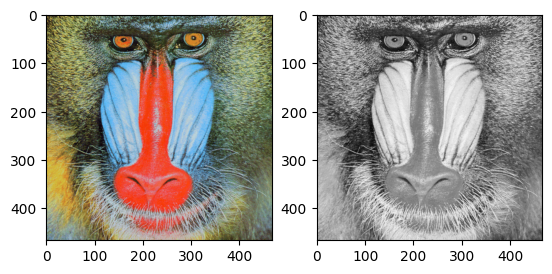

In [18]:
#Tugas praktikum 4 a

original3 = original1.copy()
original3 = cv.cvtColor(original1, cv.COLOR_BGR2RGB)

original3_averaging = np.zeros((original1.shape[0], original1.shape[1]), dtype=np.uint8)
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    original3_averaging[y, x] = int(np.mean(original1[y,x]))

fig, axes = plt.subplots(1, 2)
axes[0].imshow(original3)
axes[1].imshow(original3_averaging, cmap='gray')

b. Lightness

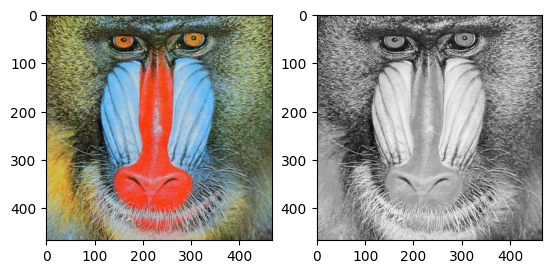

In [19]:
#Tugas praktikum 4 b

original3_lightness = np.zeros((original1.shape[0], original1.shape[1]), dtype=np.uint8)
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
        max_val = int(np.max(original1[y, x]))
        min_val = int(np.min(original1[y, x]))
        original3_lightness[y, x] = (max_val + min_val) // 2

fig, axes = plt.subplots(1, 2)
axes[0].imshow(original3)
axes[1].imshow(original3_lightness, cmap='gray')

c. Luminance

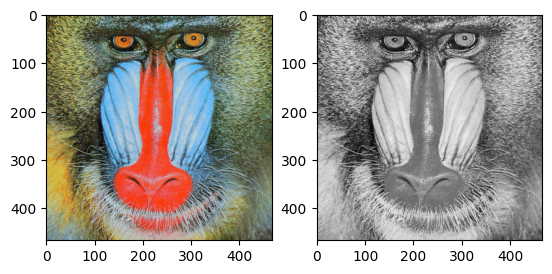

In [20]:
#Tugas praktikum 4 c

original3_luminance = np.zeros((original1.shape[0], original1.shape[1]), dtype=np.uint8)
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
      r, g, b = original1[y, x][2], original1[y, x][1], original1[y, x][0]
      original3_luminance[y, x] = int(0.21 * r + 0.72 * g + 0.07 * b)

fig, axes = plt.subplots(1,2)
axes[0].imshow(original3)
axes[1].imshow(original3_luminance, cmap='gray')

TUGAS PRAKTIKUM
5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

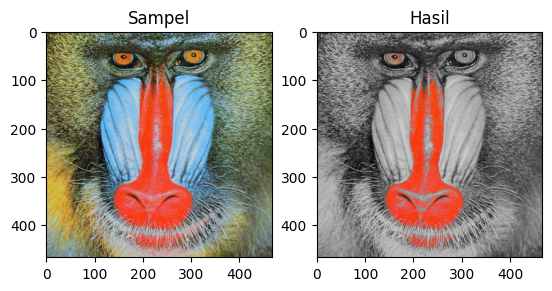

In [29]:
#Tugas praktikum 5

original4 = original1.copy()
original4 = cv.cvtColor(original1, cv.COLOR_BGR2RGB)

min_blue = np.array([150, 0, 0])
max_blue = np.array([255, 100, 100])

mark = cv.inRange(original4, min_blue, max_blue)

grayscale = cv.cvtColor(original3, cv.COLOR_RGB2GRAY)
grayscale = cv.cvtColor(grayscale, cv.COLOR_GRAY2RGB)

final_frame4 = np.where(mark[:, :, None].astype(bool), original4, grayscale)

plt.subplot(1, 2, 1)
plt.title('Sampel')
plt.imshow(original4)

plt.subplot(1, 2, 2)
plt.title('Hasil')
plt.imshow(final_frame4)

plt.show()